###    Data manipulation



Plan 
- add new variables
- separate based on a character
- convert variable to numeric
- string manipulation
- rename variables
- filter observations
- sorting data

In [1]:
#  Import libraries
import pandas as pd
import numpy as np

In [2]:
#       importing data from a KNOWN website
raw_df = pd.read_csv("https://osf.io/yzntm/download")
#       of if downloaded raw_df = pd.read_csv("hotel_vienna_restricted.csv")

In [3]:
type(raw_df)

pandas.core.frame.DataFrame

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149966 entries, 0 to 149965
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   addresscountryname      149966 non-null  object 
 1   city_actual             149966 non-null  object 
 2   rating_reviewcount      139379 non-null  float64
 3   center1distance         149966 non-null  object 
 4   center1label            149966 non-null  object 
 5   center2distance         149852 non-null  object 
 6   center2label            149852 non-null  object 
 7   neighbourhood           149966 non-null  object 
 8   price                   149966 non-null  int64  
 9   price_night             149966 non-null  object 
 10  s_city                  149966 non-null  object 
 11  starrating              149966 non-null  float64
 12  rating2_ta              136929 non-null  float64
 13  rating2_ta_reviewcount  136929 non-null  float64
 14  accommodationtype   

In [5]:
#           to have a quick look, possibility to extract the headers
raw_df.head()

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,0,0% no offer,2017,11,1,0
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,1,1,0
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2017,12,0,1
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,1-15% offer,2017,12,0,1
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,2,1,0


In [6]:
raw_df.shape

(149966, 24)

In [7]:
#              Goal : find number of night per accomomdation type
#                   in order to do so, we create a new variable equal to 1 for each observation - before we check that our 
raw_df.columns

Index(['addresscountryname', 'city_actual', 'rating_reviewcount',
       'center1distance', 'center1label', 'center2distance', 'center2label',
       'neighbourhood', 'price', 'price_night', 's_city', 'starrating',
       'rating2_ta', 'rating2_ta_reviewcount', 'accommodationtype',
       'guestreviewsrating', 'scarce_room', 'hotel_id', 'offer', 'offer_cat',
       'year', 'month', 'weekend', 'holiday'],
      dtype='object')

In [8]:
raw_df["nnights"] = 1
raw_df.nnights

0         1
1         1
2         1
3         1
4         1
         ..
149961    1
149962    1
149963    1
149964    1
149965    1
Name: nnights, Length: 149966, dtype: int64

In [9]:
#            Second option of creating new variable 
df = raw_df.assign(nnights = 1)

In [10]:
#        if I want to delete the old data raw_df

In [11]:
#          Looking at accomodation type variable/ seems dirty let's clean it
df.accommodationtype

0         _ACCOM_TYPE@Hotel
1         _ACCOM_TYPE@Hotel
2         _ACCOM_TYPE@Hotel
3         _ACCOM_TYPE@Hotel
4         _ACCOM_TYPE@Hotel
                ...        
149961    _ACCOM_TYPE@Hotel
149962    _ACCOM_TYPE@Hotel
149963    _ACCOM_TYPE@Hotel
149964    _ACCOM_TYPE@Hotel
149965    _ACCOM_TYPE@Hotel
Name: accommodationtype, Length: 149966, dtype: object

In [12]:
#            We want to split strings at @ sign
df.accommodationtype.str.split('@')

0         [_ACCOM_TYPE, Hotel]
1         [_ACCOM_TYPE, Hotel]
2         [_ACCOM_TYPE, Hotel]
3         [_ACCOM_TYPE, Hotel]
4         [_ACCOM_TYPE, Hotel]
                  ...         
149961    [_ACCOM_TYPE, Hotel]
149962    [_ACCOM_TYPE, Hotel]
149963    [_ACCOM_TYPE, Hotel]
149964    [_ACCOM_TYPE, Hotel]
149965    [_ACCOM_TYPE, Hotel]
Name: accommodationtype, Length: 149966, dtype: object

In [13]:
#             We want to grab the second element of each observation
df.accommodationtype.str.split('@').str[1]

0         Hotel
1         Hotel
2         Hotel
3         Hotel
4         Hotel
          ...  
149961    Hotel
149962    Hotel
149963    Hotel
149964    Hotel
149965    Hotel
Name: accommodationtype, Length: 149966, dtype: object

In [14]:
#            Now we want to assign it to our df
df["acc_type"] = df.accommodationtype.str.split('@').str[1]

In [15]:
#           Finally we can check number of nigh per accommodatioin type
df["acc_type"].value_counts()

Hotel                  102234
Apartment               17113
Guest House             10080
Bed and breakfast        6395
Hostel                   6232
Apart-hotel              3693
Vacation home Condo      1576
Pension                  1085
Inn                      1020
Country House              89
Palace                     68
                           65
Villa                      64
Resort                     60
Caravan Park               60
House boat                 31
Pousada                    28
Motel                      25
Cabin / Lodge              14
Cottage                    13
Chalet                     11
Castle                      5
All inclusive               5
Name: acc_type, dtype: int64

In [16]:
#          Replace the missing category with some meaningful info
df.acc_type.replace("","Unknown",inplace=True)

In [17]:
#         checking the results
df.acc_type.value_counts()

Hotel                  102234
Apartment               17113
Guest House             10080
Bed and breakfast        6395
Hostel                   6232
Apart-hotel              3693
Vacation home Condo      1576
Pension                  1085
Inn                      1020
Country House              89
Palace                     68
Unknown                    65
Villa                      64
Resort                     60
Caravan Park               60
House boat                 31
Pousada                    28
Motel                      25
Cabin / Lodge              14
Cottage                    13
Chalet                     11
Castle                      5
All inclusive               5
Name: acc_type, dtype: int64

###       Convert string to numeric columns
 - Correct *guestreviewrating
 - Check w/ the dtyp property
 - Convert to numeric

In [18]:
#      Lets checl out the variable
df.guestreviewsrating.head()

0    4.3 /5
1    4.3 /5
2    4.3 /5
3    4.3 /5
4    4.3 /5
Name: guestreviewsrating, dtype: object

In [19]:
df.guestreviewsrating

0         4.3 /5
1         4.3 /5
2         4.3 /5
3         4.3 /5
4         4.3 /5
           ...  
149961    4.5 /5
149962    4.5 /5
149963    4.5 /5
149964    4.5 /5
149965    4.5 /5
Name: guestreviewsrating, Length: 149966, dtype: object

In [20]:
df.guestreviewsrating.value_counts()

4 /5      23160
3.7 /5    15031
4.5 /5    14952
4.3 /5    11268
4.1 /5    11190
3.5 /5    11145
4.4 /5     9079
3.9 /5     8853
3.2 /5     6112
3 /5       4838
4.6 /5     4417
3.4 /5     3727
4.8 /5     3095
5 /5       2646
2.7 /5     2337
2.5 /5     1557
2.9 /5     1213
4.9 /5     1157
2.2 /5      976
2 /5        976
1 /5        679
2.4 /5      472
1.7 /5      143
1.8 /5      112
1.5 /5       91
1.6 /5       54
1.2 /5       48
1.3 /5       41
1.1 /5       10
Name: guestreviewsrating, dtype: int64

In [21]:
df["ratings"] = df["guestreviewsrating"].str.split("/").str[0].str.strip()

In [22]:
#          What's the data tye of the newly created column
df.ratings.dtype

dtype('O')

In [23]:
#          Not good, it's not numeric
#          Let's convert it to
df["ratings"] = df["ratings"].astype(float)

In [24]:
df.ratings

0         4.3
1         4.3
2         4.3
3         4.3
4         4.3
         ... 
149961    4.5
149962    4.5
149963    4.5
149964    4.5
149965    4.5
Name: ratings, Length: 149966, dtype: float64

In [25]:
df.ratings.mean()

3.9072614956342058

<Axes: >

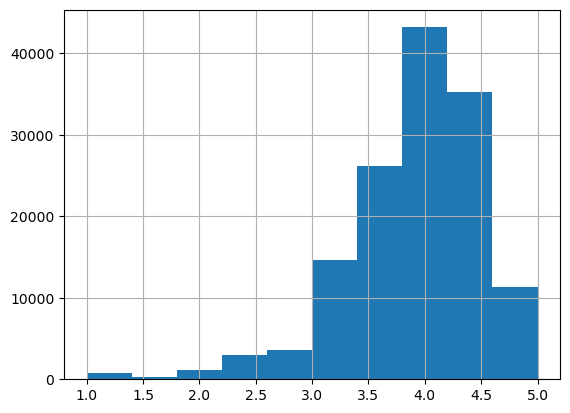

In [26]:
df.ratings.hist()

In [27]:
#          Task:
#          Create numeric variables for "center1distance" and "center2distance"

In [28]:
df.center2distance

0         3.6 miles
1         3.6 miles
2         3.6 miles
3         3.6 miles
4         3.6 miles
            ...    
149961    0.6 miles
149962    0.6 miles
149963    0.6 miles
149964    0.6 miles
149965    0.6 miles
Name: center2distance, Length: 149966, dtype: object

In [29]:
df["dist_to_center_1"] = df.center1distance.str.split(' ').str[0]

In [30]:
df["dist_to_center_1"] = df["dist_to_center_1"].astype(float)

In [31]:
df.dist_to_center_1.mean()

2.839012176093248

In [32]:
df["dist_to_center_2"] = df.center2distance.str.split(' ').str[0]

In [33]:
df["dist_to_center_2"] = df["dist_to_center_2"].astype(float)

In [34]:
df.dist_to_center_2.mean()

4.915309772308679

<Axes: >

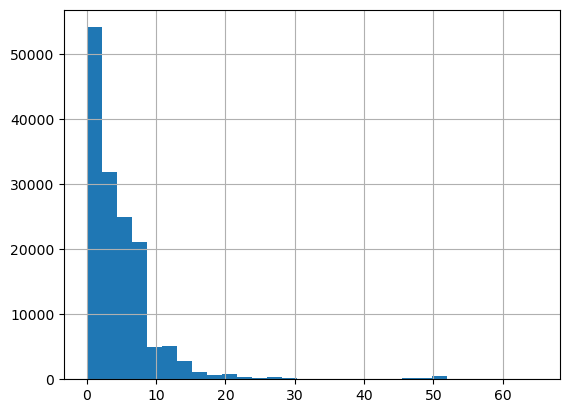

In [35]:
#         I can define the number of bins (columns) on the histogram, here 30
df.dist_to_center_2.hist(bins=30)

In [36]:
#          Check out all the ratings variables
#           using the filter
df.filter(regex = 'rating')

,rating_reviewcount,starrating,rating2_ta,rating2_ta_reviewcount,guestreviewsrating,ratings
0,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
1,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
2,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
3,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
4,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
...,...,...,...,...,...,...
149961,48.0,4.0,4.5,86.0,4.5 /5,4.5
149962,48.0,4.0,4.5,86.0,4.5 /5,4.5
149963,48.0,4.0,4.5,86.0,4.5 /5,4.5
149964,48.0,4.0,4.5,86.0,4.5 /5,4.5


In [37]:
#     Let's rename o few of those

In [38]:
df.rename(columns={'rating_reviewcount':'rating_count','rating2_ta':'ratingta=, inplace=True'})
#               other possibility     df = df.rename(.....) without inplace= argument

,addresscountryname,city_actual,rating_count,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,offer_cat,year,month,weekend,holiday,nnights,acc_type,ratings,dist_to_center_1,dist_to_center_2
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,...,0% no offer,2017,11,1,0,1,Hotel,4.3,3.1,3.6
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,15-50% offer,2018,1,1,0,1,Hotel,4.3,3.1,3.6
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,15-50% offer,2017,12,0,1,1,Hotel,4.3,3.1,3.6
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,...,1-15% offer,2017,12,0,1,1,Hotel,4.3,3.1,3.6
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,15-50% offer,2018,2,1,0,1,Hotel,4.3,3.1,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149961,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,119,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,4.5,1.1,0.6
149962,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,109,price for 1 night,...,15-50% offer,2018,4,1,0,1,Hotel,4.5,1.1,0.6
149963,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,109,price for 1 night,...,15-50% offer,2018,3,1,0,1,Hotel,4.5,1.1,0.6
149964,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,446,price for 4 nights,...,15-50% offer,2017,12,0,1,1,Hotel,4.5,1.1,0.6


In [39]:
df.columns

Index(['addresscountryname', 'city_actual', 'rating_reviewcount',
       'center1distance', 'center1label', 'center2distance', 'center2label',
       'neighbourhood', 'price', 'price_night', 's_city', 'starrating',
       'rating2_ta', 'rating2_ta_reviewcount', 'accommodationtype',
       'guestreviewsrating', 'scarce_room', 'hotel_id', 'offer', 'offer_cat',
       'year', 'month', 'weekend', 'holiday', 'nnights', 'acc_type', 'ratings',
       'dist_to_center_1', 'dist_to_center_2'],
      dtype='object')

#   TASK : renaming

In [42]:
df.columns

Index(['addresscountryname', 'city_actual', 'rating_reviewcount',
       'center1distance', 'center1label', 'center2distance', 'center2label',
       'neighbourhood', 'price', 'price_night', 's_city', 'starrating',
       'rating2_ta', 'rating2_ta_reviewcount', 'accommodationtype',
       'guestreviewsrating', 'scarce_room', 'hotel_id', 'offer', 'offer_cat',
       'year', 'month', 'weekend', 'holiday', 'nnights', 'acc_type', 'ratings',
       'dist_to_center_1', 'dist_to_center_2'],
      dtype='object')

In [127]:
df = df.rename(columns={'rating2_ta_reviewcount':'ratinga_count','addresscountryname':'country','starrating':'stars','s_city':'city'})

In [128]:
df.columns

Index(['country', 'city_actual', 'rating_reviewcount', 'center1distance',
       'center1label', 'center2distance', 'center2label', 'neighbourhood',
       'price', 'price_night', 'city', 'stars', 'rating2_ta', 'ratinga_count',
       'accommodationtype', 'guestreviewsrating', 'scarce_room', 'hotel_id',
       'offer', 'offer_cat', 'year', 'month', 'weekend', 'holiday', 'nnights',
       'acc_type', 'ratings', 'dist_to_center_1', 'dist_to_center_2'],
      dtype='object')

In [52]:
df.acc_type

0         Hotel
1         Hotel
2         Hotel
3         Hotel
4         Hotel
          ...  
149961    Hotel
149962    Hotel
149963    Hotel
149964    Hotel
149965    Hotel
Name: acc_type, Length: 149966, dtype: object

In [59]:
df.loc[df["acc_type"] == 'Hotel'].head()

,country,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,offer_cat,year,month,weekend,holiday,nnights,acc_type,ratings,dist_to_center_1,dist_to_center_2
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,...,0% no offer,2017,11,1,0,1,Hotel,4.3,3.1,3.6
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,15-50% offer,2018,1,1,0,1,Hotel,4.3,3.1,3.6
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,15-50% offer,2017,12,0,1,1,Hotel,4.3,3.1,3.6
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,...,1-15% offer,2017,12,0,1,1,Hotel,4.3,3.1,3.6
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,15-50% offer,2018,2,1,0,1,Hotel,4.3,3.1,3.6


In [60]:
#check if we have missing values in the rating column
df["ratings"].isnull().sum()

10587

In [62]:
# check missing values by country - order to the methods matters !!!
df["ratings"].isnull().groupby(df.country).sum()

country
Austria            449
Belarus             65
Belgium             75
Bulgaria            80
Cameroon             0
Croatia             66
Cyprus               0
Czech Republic     158
Denmark             15
Egypt                1
Estonia              8
Finland             43
France             322
Germany            114
Greece             155
Hungary             82
Ireland             85
Italy             3046
Latvia              60
Lithuania           57
Malta               99
Netherlands         48
Poland             914
Portugal           182
Romania             83
Russia            2112
Serbia              51
Slovakia            71
Spain              358
Sweden              41
Turkey            1023
Ukraine            156
United Kingdom     568
Name: ratings, dtype: int64

In [66]:
# check out data for which ratings is missing
df.loc[df['ratings'].isnull()

SyntaxError: incomplete input (1375903944.py, line 2)

df.columns

In [68]:
df.columns

Index(['country', 'city_actual', 'rating_reviewcount', 'center1distance',
       'center1label', 'center2distance', 'center2label', 'neighbourhood',
       'price', 'price_night', 'city', 'stars', 'rating2_ta',
       'rating2_ta_reviewcount', 'accommodationtype', 'guestreviewsrating',
       'scarce_room', 'hotel_id', 'offer', 'offer_cat', 'year', 'month',
       'weekend', 'holiday', 'nnights', 'acc_type', 'ratings',
       'dist_to_center_1', 'dist_to_center_2'],
      dtype='object')

In [71]:
#  Often we want to drop missing observations for key variables
#  Two ways
#1 . 
# df = df.loc[df["ratings"].notnull()]
#2
df = df.dropna(subset=["ratings"])

In [72]:
#  Did it work?
#   f   says to Python tis is a function to execute
print(f'Now there are {df["ratings"].isnull().sum()} observations missing')

Now there are 0 observations missing


### Wrongly documented observations

for the stars column, there are values from 0-5. Minimum should be 1 and not 0

In [75]:
df.stars.value_counts()

3.0    41692
4.0    38583
0.0    22451
2.0    13360
5.0     8346
3.5     7797
2.5     2940
1.0     2383
4.5     1661
1.5      166
Name: stars, dtype: int64

In [77]:
###  Now we want to replace the 0.0s with 1.0s using the  np.where()  method
df["stars"] = np.where(df["stars"] == 0.0, 1.0, df["stars"])

In [79]:
df.stars.value_counts()

3.0    41692
4.0    38583
1.0    24834
2.0    13360
5.0     8346
3.5     7797
2.5     2940
4.5     1661
1.5      166
Name: stars, dtype: int64

In [80]:
#  It worked, no more 0.0

In [82]:
#  Check for duplicates
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
149961    False
149962    False
149963    False
149964    False
149965    False
Length: 139379, dtype: bool

In [83]:
df.duplicated().sum()

1761

In [84]:
#    nnicer presentation
print(f'We have {df.duplicated().sum()} duplicates)

SyntaxError: unterminated string literal (detected at line 2) (570108790.py, line 2)

In [86]:
df = df.drop_duplicates()

In [87]:
df.shape

(137618, 29)

###   Task
we are nterested in the following data
1. get hotels from Vienna only
2. only in 2017, november
3. drop observations with price > 1000€

Create a dataFrame df_vienna that only included information specified above

In [88]:
df.head(5)

,country,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,offer_cat,year,month,weekend,holiday,nnights,acc_type,ratings,dist_to_center_1,dist_to_center_2
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,...,0% no offer,2017,11,1,0,1,Hotel,4.3,3.1,3.6
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,15-50% offer,2018,1,1,0,1,Hotel,4.3,3.1,3.6
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,15-50% offer,2017,12,0,1,1,Hotel,4.3,3.1,3.6
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,...,1-15% offer,2017,12,0,1,1,Hotel,4.3,3.1,3.6
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,15-50% offer,2018,2,1,0,1,Hotel,4.3,3.1,3.6


In [109]:
df_Vienna = df

In [105]:
df_Vienna.head(5)

,country,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,offer_cat,year,month,weekend,holiday,nnights,acc_type,ratings,dist_to_center_1,dist_to_center_2
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,...,0% no offer,2017,11,1,0,1,Hotel,4.3,3.1,3.6
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,15-50% offer,2018,1,1,0,1,Hotel,4.3,3.1,3.6
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,15-50% offer,2017,12,0,1,1,Hotel,4.3,3.1,3.6
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,...,1-15% offer,2017,12,0,1,1,Hotel,4.3,3.1,3.6
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,15-50% offer,2018,2,1,0,1,Hotel,4.3,3.1,3.6


In [110]:
df_Vienna = df.loc[df_Vienna["city"] == 'Vienna']

In [130]:
df.shape

(137618, 29)

In [129]:
# checking where city_actual differs from city
df.[["city","city_actual"]].loc[df.city != df.city_actual]

SyntaxError: invalid syntax (1174127245.py, line 2)

In [118]:
#  First Option
#    df_Vienna = df_Vienna.loc[df_Vienna.year == 2017]
#    df_Vienna = df_Vienna.loc[hotels_vienna.month == 11]
#  Second option : compound
df_Vienna = df_Vienna.loc[(df_Vienna.year == 2017) & (df_Vienna.month == 11)]

In [120]:
df_Vienna.columns

Index(['country', 'city_actual', 'rating_reviewcount', 'center1distance',
       'center1label', 'center2distance', 'center2label', 'neighbourhood',
       'price', 'price_night', 'city', 'stars', 'rating2_ta',
       'rating2_ta_reviewcount', 'accommodationtype', 'guestreviewsrating',
       'scarce_room', 'hotel_id', 'offer', 'offer_cat', 'year', 'month',
       'weekend', 'holiday', 'nnights', 'acc_type', 'ratings',
       'dist_to_center_1', 'dist_to_center_2'],
      dtype='object')

In [121]:
df_Vienna = df_Vienna.loc[df_Vienna.price > 1000]

In [123]:
df_Vienna.shape

(1, 29)

In [131]:
df_Vienna

,country,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,offer_cat,year,month,weekend,holiday,nnights,acc_type,ratings,dist_to_center_1,dist_to_center_2
144928,Austria,Vienna,77.0,1.0 mile,City centre,3.8 miles,Donauturm,Neubau,1012,price for 1 night,...,1-15% offer,2017,11,0,0,1,Hotel,4.3,1.0,3.8
